6.5 Unsupervised Machine Learning - Clustering

This Script Includes

1. Importing Libraries and data 

2. Data Cleaning

2. Elbow technique 

3. K-Means clustering

1. Importing Libraries

In [30]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pylab as pl
import warnings 

In [32]:
%matplotlib inline

In [34]:
df_cacao_cleaned = pd.read_csv("../Data/Updated/df_cacao_cleaned.csv")

2. Data Cleaning

In [37]:
df_cacao_cleaned.head()

,Company,Specific_Bean_Origin,Reference_Number,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin,Rating_meaning
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,Blend,São Tomé and Príncipe,Praiseworthy
1,A. Morin,Kpime,1676,2015,70%,France,2.75,Blend,Togo,Mediocre
2,A. Morin,Cusco,1676,2015,70%,France,3.00,Blend,Togo,Satisfactory
3,A. Morin,Akata,1680,2015,70%,France,3.50,Blend,Togo,Satisfactory
4,A. Morin,Quilla,1704,2015,70%,France,3.50,Blend,Peru,Satisfactory


In [39]:
df_cacao_cleaned['Cocoa_Percent'] = df_cacao_cleaned['Cocoa_Percent'].str.replace('%', '').astype(float) / 100

In [41]:
print(df_cacao_cleaned)

       Company Specific_Bean_Origin  Reference_Number  Review_Date  \
0     A. Morin          Agua Grande              1876         2016   
1     A. Morin                Kpime              1676         2015   
2     A. Morin                Cusco              1676         2015   
3     A. Morin                Akata              1680         2015   
4     A. Morin               Quilla              1704         2015   
...        ...                  ...               ...          ...   
1648    Zotter                 Kivu               749         2011   
1649    Zotter         Kerala State               749         2011   
1650    Zotter         Kerala State               781         2011   
1651    Zotter                Bahia               486         2010   
1652    Amedei        Toscano Black                40         2006   

      Cocoa_Percent Company_Location  Rating  Bean_Type  \
0              0.63           France    3.75      Blend   
1              0.70           France    2

In [43]:
print(df_cacao_cleaned['Review_Date'].dtype)

int64


In [45]:
print(df_cacao_cleaned['Rating'].dtype)

float64


In [47]:
df_cacao_cleaned['Review_Date'] = df_cacao_cleaned['Review_Date'].astype(float)


In [49]:
print(df_cacao_cleaned)


       Company Specific_Bean_Origin  Reference_Number  Review_Date  \
0     A. Morin          Agua Grande              1876       2016.0   
1     A. Morin                Kpime              1676       2015.0   
2     A. Morin                Cusco              1676       2015.0   
3     A. Morin                Akata              1680       2015.0   
4     A. Morin               Quilla              1704       2015.0   
...        ...                  ...               ...          ...   
1648    Zotter                 Kivu               749       2011.0   
1649    Zotter         Kerala State               749       2011.0   
1650    Zotter         Kerala State               781       2011.0   
1651    Zotter                Bahia               486       2010.0   
1652    Amedei        Toscano Black                40       2006.0   

      Cocoa_Percent Company_Location  Rating  Bean_Type  \
0              0.63           France    3.75      Blend   
1              0.70           France    2

In [51]:
print(df_cacao_cleaned['Cocoa_Percent'].dtype)

float64


3. The Elbow Method

In [54]:
df_cacao_cleaned_numeric = df_cacao_cleaned.select_dtypes(include=[np.number]).drop(columns=['Reference_Number'])


In [56]:
#Define the range of potential clusters in the data
num_cl = range(1, 10)
wcss = []
for i in num_cl: 
# Define k-means clusters in the range assigned above
    kmeans = KMeans(n_clusters = i)
# Each k-means algorithm is applied onto data
kmeans.fit(df_cacao_cleaned_numeric)
# We access the inertia_ attribute of the fitted KMeans object, which contains the WCSS value
wcss.append(kmeans.inertia_)

C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


In [57]:
# Using the elbow technique with the negative inertia (score) method
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]
score = [kmeans[i].fit(df_cacao_cleaned_numeric).score(df_cacao_cleaned_numeric) for i in range(len(kmeans))]

C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

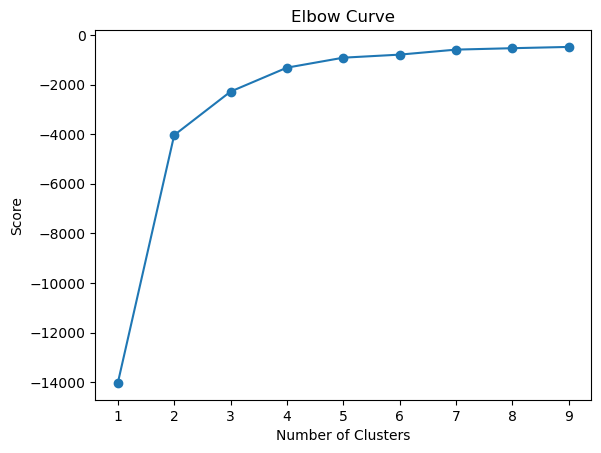

In [60]:
#Plot the elbow method graph with pylab
pl.plot(num_cl,score, marker='o')
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Observation: The cluster curve appears to be 3 because the curve begins to flatten a bit after  it 

4. K-Means clustering

In [64]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cacao_cleaned[['Cocoa_Percent', 'Rating']])

In [66]:
#Apply the K-means algorithm to the standardized data with the chosen number of clusters
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=18, n_init=10)

In [68]:
kmeans = KMeans(n_clusters=3)
df_cacao_cleaned['Cluster'] = kmeans.fit_predict(scaled_features)

C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


In [70]:
# Add the cluster labels to the original dataframe and to the subset
df_cacao_cleaned['Cluster'] = kmeans.fit_predict(scaled_features)
df_cacao_cleaned_numeric['Cluster'] = kmeans.fit_predict(scaled_features)

C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


In [72]:
print(df_cacao_cleaned_numeric.head())

   Review_Date  Cocoa_Percent  Rating  Cluster
0       2016.0           0.63    3.75        0
1       2015.0           0.70    2.75        2
2       2015.0           0.70    3.00        2
3       2015.0           0.70    3.50        0
4       2015.0           0.70    3.50        0


In [74]:
df_cacao_cleaned_numeric['Cluster'].value_counts()

Cluster
0    808
2    636
1    209
Name: count, dtype: int64

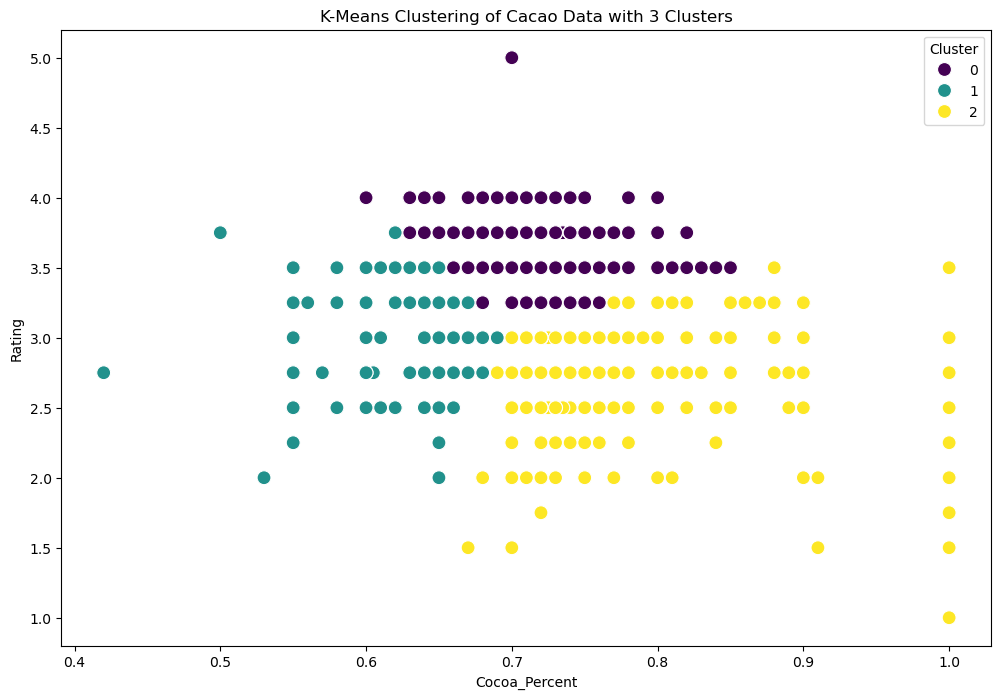

In [76]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_cacao_cleaned_numeric, x='Cocoa_Percent', y='Rating', hue='Cluster', palette='viridis', s=100)
plt.title('K-Means Clustering of Cacao Data with 3 Clusters')
plt.xlabel('Cocoa_Percent')
plt.ylabel('Rating')
plt.legend(title='Cluster')
plt.show()

Cluster Characteristics:

Cluster 0 (Purple): This cluster seems to have data points with lower cocoa percentages and lower ratings.

Cluster 2 (Yellow): This cluster has data points with higher cocoa percentages and higher ratings.

Cluster 1 (Teal): This cluster appears to have data points with moderate cocoa percentages and ratings.

The clustering suggests that there is a relationship between cocoa percentage and rating. 
Higher cocoa percentages tend to be associated with higher ratings, while lower cocoa percentages are associated with lower ratings.

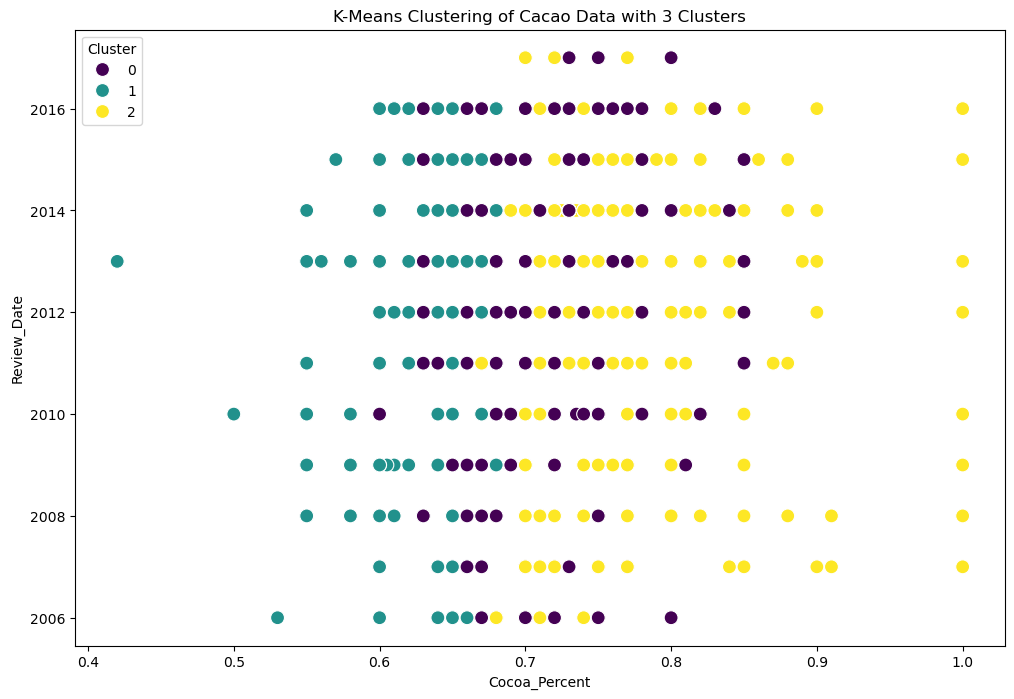

In [79]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_cacao_cleaned_numeric, x='Cocoa_Percent', y='Review_Date', hue='Cluster', palette='viridis', s=100)
plt.title('K-Means Clustering of Cacao Data with 3 Clusters')
plt.xlabel('Cocoa_Percent')
plt.ylabel('Review_Date')
plt.legend(title='Cluster')
plt.show()

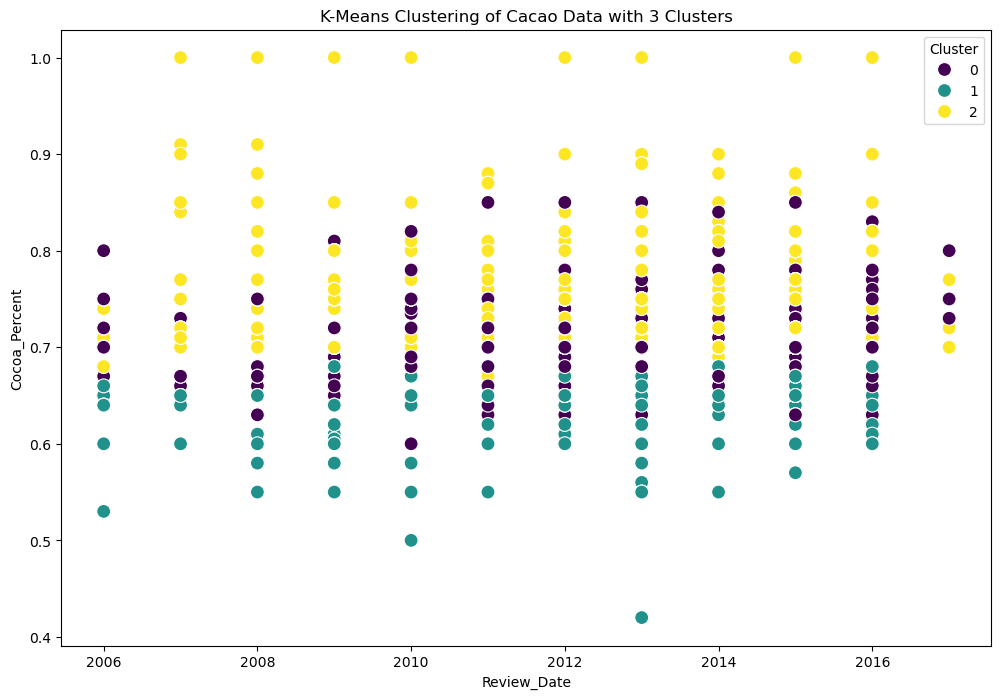

In [80]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_cacao_cleaned_numeric, x='Review_Date', y='Cocoa_Percent', hue='Cluster', palette='viridis', s=100)
plt.title('K-Means Clustering of Cacao Data with 3 Clusters')
plt.xlabel('Review_Date')
plt.ylabel('Cocoa_Percent')
plt.legend(title='Cluster')
plt.show()

Observation: The last two cluster visualizations do not make sense. This means I will have to do further digging that I would prefer to do in Tableau
As I feel like it would be potentially be more beneficial. 

In [84]:
cluster_stats = df_cacao_cleaned_numeric.groupby('Cluster').agg(['count', 'mean', 'std', 'min', 'max'])
print(cluster_stats)

        Review_Date                                        Cocoa_Percent  \
              count         mean       std     min     max         count   
Cluster                                                                    
0               808  2012.799505  2.780602  2006.0  2017.0           808   
1               209  2011.617225  3.002706  2006.0  2016.0           209   
2               636  2012.245283  2.885679  2006.0  2017.0           636   

                                        Rating                                  
             mean       std   min   max  count      mean       std   min   max  
Cluster                                                                         
0        0.714932  0.033164  0.60  0.85    808  3.556312  0.247197  3.25  5.00  
1        0.628923  0.038976  0.42  0.69    209  3.037081  0.347727  2.00  3.75  
2        0.748074  0.063908  0.67  1.00    636  2.793239  0.305297  1.00  3.50  


Observation:

Consistency: All clusters have similar mean review dates and cocoa percentages, indicating consistent data distribution.
Variability: The standard deviations are relatively low, suggesting that the data points within each cluster are close to their respective means.
Range: The range of review dates and cocoa percentages is similar across clusters, showing no significant outliers.m

All clusters have a similar mean cocoa percent (around 72.67%), indicating that the chocolates being reviewed generally have a moderate to high 
cocoa content across all clusters.

The mean review dates for all clusters are around 2012, suggesting that the reviews were conducted within a similar time frame. 

he standard deviations for both review dates and cocoa percentages are relatively low, indicating that the data points within each cluster are 
close to their respective means. This suggests that there is not much variation within each cluster

Overall, the clusters seem to be quite similar in terms of cocoa percent and review date, which might indicate that the clustering
is more influenced by other factors not included in the summary

---------------------------------------------------------------------------------------------------------------------------------------------------------

The k-means clustering analysis can be useful in multiple future steps in an analytics pipeline. 
For example, It can be useful for predictive modeling to potentially improve the accuracy of the models. 
 Also creating visualizations and reports based on the clusterscan enhance the understanding and communicatino of the insights
Which is always good to have because it can inform business decisions